# EDA

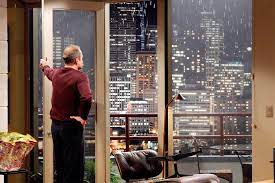

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
import pandas as pd
import psycopg2

import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

cur = conn.cursor()

sql_query_fetch_all_data = """
    SELECT *
    FROM eda.king_county_house_details kchd
    JOIN eda.king_county_house_sales kchs
    ON kchd.id = kchs.house_id;
"""
cur.execute(sql_query_fetch_all_data)
cur.fetchall()

# import the data into a pandas dataframe
df_join = pd.read_sql(sql_query_fetch_all_data, conn)

#close the connection
conn.close()

df_join.head()

#export the data to a csv-file
df_join.to_csv('eda_all.csv',index=False)

#import the data from a csv-file
df_eda = pd.read_csv('eda_all.csv')


In [221]:
#import the data from a csv-file, looking at the basics
df_eda = pd.read_csv('eda_all.csv')
df_eda.head(5)
df_eda.info()
df_eda.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


<Axes: xlabel='price', ylabel='Count'>

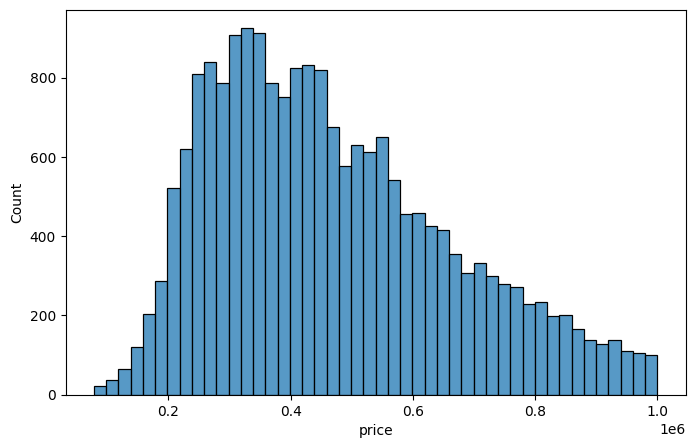

In [218]:
#checking each variable

df_eda['bedrooms'].unique()
df_eda.groupby('bedrooms').count()['id']  #should be rounded, 1-8(11), outlier 33, normal distribution
df_eda.groupby('bathrooms').count()['id']  #should be rounded, 0.5-8, 0.25/0.5/.75 bathrooms, bins?, peak at 1,1.75 and 2.5
df_eda.describe()['sqft_living']            #median 1910, 370-13540, normal distribution, outliers >6000
#sns.histplot(data=df_eda,x='sqft_living')
df_eda.describe()['sqft_lot']               #median 7618, normal distribution up to 90% percentil?
df_eda.groupby('floors').count()['id']      #should be rounded, 1-3.5, modal 1
df_eda.groupby('waterfront').count()['id']  #1=yes, missing values
df_eda.groupby('view').count()['id']        #meaning?, integer 0-4, 0=poor to 4=great??? missing values
df_eda.groupby('condition').count()['id']   #integer 1-5, 1=poor to 5=great???
df_eda.describe()['sqft_above']             #median 1560, 370 - 9410, normal distribution, outliers >4000
#sns.histplot(data=df_eda,x='sqft_above')
df_eda.describe()['sqft_basement']          #median 0 (no basement), 0 - 4820, normal distribution w/o 0 and outliers >1500, missing values (no basement?)
#sns.histplot(data=df_eda,x='sqft_basement')
df_eda.groupby('yr_built').count()['id']    #1900-2015, multimodal distribution, bins?
#sns.histplot(data=df_eda,x='yr_built')
df_eda.groupby('yr_renovated').count()['id']  #1930-2015, rechtsschief, divide by 10!!!, 0 (no renovation) and missing values (also no renovation?)
#sns.histplot(data=df_eda[df_eda['yr_renovated']>0],x='yr_renovated')
df_eda.groupby('zipcode').count()['id']
#sns.histplot(data=df_eda,x='zipcode')
df_eda.describe()['sqft_living15']          #median 1840, 399-6210, normal distribution, outliers >4000, no really big outlier
#sns.histplot(data=df_eda,x='sqft_living15')
df_eda.describe()['sqft_lot15']             #median 7620, 651-871200, normal distribution, percentile?
#sns.histplot(data=df_eda,x='sqft_lot15')
df_eda.describe()['price']                  #median 450000, 78000-7.700.000, normal distribution bis 1000000 
sns.histplot(data=df_eda[df_eda['price']<1000000],x='price')

#df_eda.groupby('grade').count()['id']      #integer 3-13, 3=poor to 13=great???, meaning? height, normal distribution




<Axes: xlabel='sqft_living', ylabel='price'>

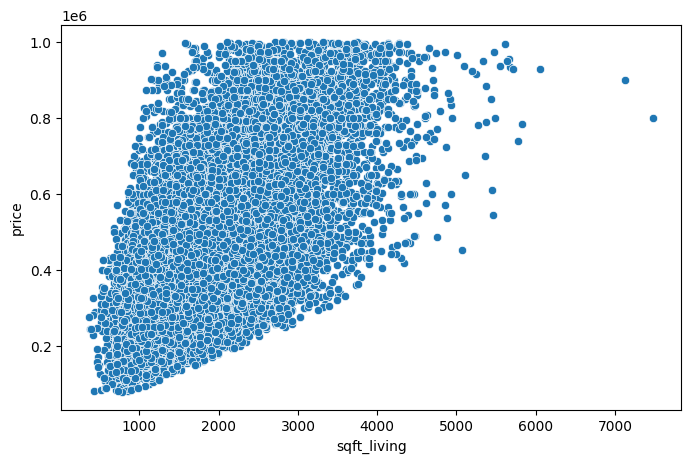

In [220]:
sns.scatterplot(data=df_eda[df_eda['price']<1000000],x='sqft_living',y='price')

In [6]:
# check duplicates
df_eda.duplicated().value_counts() #no duplicates

# adjusting datatype for date
type(df_eda['date'][0])
df_eda['date'] = pd.to_datetime(df_eda['date'], format='%Y-%m-%d')

# Year renovated adjusting by 0.1
df_eda['yr_renovated'] = df_eda.yr_renovated.apply(lambda x: x*0.1)

df_eda.describe()['date']

# Missing Values waterfront, view keep as missing information, sqft_basement and yr_renovated will be covered in two new variables (binary)

count                            21597
mean     2014-10-29 04:20:38.171968512
min                2014-05-02 00:00:00
25%                2014-07-22 00:00:00
50%                2014-10-16 00:00:00
75%                2015-02-17 00:00:00
max                2015-05-27 00:00:00
std                                NaN
Name: date, dtype: object

In [7]:
# rounding

df_eda['bedrooms'].replace(df_eda['bedrooms'].round(0))
df_eda['bathrooms'] = df_eda.bathrooms.round(2)
df_eda['sqft_living'] = df_eda.sqft_living.round(0)
df_eda['sqft_lot'] = df_eda.sqft_lot.round(0)
df_eda['sqft_living15'] = df_eda.sqft_living15.round(0)
df_eda['sqft_lot15'] = df_eda.sqft_lot15.round(0)
df_eda['floors'] = df_eda.floors.round(0)
df_eda['waterfront'] = df_eda.waterfront.round(0)
df_eda['view'] = df_eda.view.round(0)
df_eda['yr_built'] = df_eda.yr_built.round(0)
df_eda['yr_renovated'] = df_eda.yr_renovated.round(0)
df_eda['sqft_above'] = df_eda.sqft_above.round(0)
df_eda['sqft_basement'] = df_eda.sqft_basement.round(0)
df_eda['price'] = df_eda.price.round(0)
df_eda.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,1991.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [210]:
# checking correlations for numeric variables in working data file

df_eda_working=df_eda.copy()
df_eda_working=df_eda_working.select_dtypes(include=['number'])
del df_eda_working['id']
del df_eda_working['waterfront']
del df_eda_working['zipcode']
del df_eda_working['lat']
del df_eda_working['long']
del df_eda_working['sqft_living15']
del df_eda_working['sqft_lot15']
del df_eda_working['house_id']
del df_eda_working['id.1']
del df_eda_working['long_loc']
del df_eda_working['lat_loc']
del df_eda_working['loc_cell']
del df_eda_working['month']
del df_eda_working['year']
del df_eda_working['long_3']
del df_eda_working['lat_3']
del df_eda_working['loc_9']
df_eda_working.corr(method='pearson')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,price
bedrooms,1.000,0.515,0.578,0.032,0.180,0.079,0.026,0.357,0.479,0.303,0.156,0.018,0.309
bathrooms,0.515,1.000,0.756,0.088,0.448,0.186,-0.126,0.666,0.687,0.282,0.507,0.051,0.526
sqft_living,0.578,0.756,1.000,0.173,0.322,0.283,-0.059,0.763,0.876,0.434,0.318,0.056,0.702
sqft_lot,0.032,0.088,0.173,1.000,-0.002,0.075,-0.009,0.115,0.184,0.016,0.053,0.004,0.090
floors,0.180,0.448,0.322,-0.002,1.000,0.027,-0.224,0.408,0.488,-0.245,0.381,0.012,0.245
view,0.079,0.186,0.283,0.075,0.027,1.000,0.046,0.250,0.166,0.277,-0.055,0.101,0.396
condition,0.026,-0.126,-0.059,-0.009,-0.224,0.046,1.000,-0.147,-0.159,0.171,-0.362,-0.062,0.036
grade,0.357,0.666,0.763,0.115,0.408,0.250,-0.147,1.000,0.756,0.168,0.448,0.016,0.668
sqft_above,0.479,0.687,0.876,0.184,0.488,0.166,-0.159,0.756,1.000,-0.052,0.424,0.022,0.605
sqft_basement,0.303,0.282,0.434,0.016,-0.245,0.277,0.171,0.168,-0.052,1.000,-0.133,0.073,0.325


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id
id,1.000,-0.046,-0.048,-0.074,-0.072,0.068,NaN,0.002,-0.108,-0.013,-0.096,-0.052,-0.032,0.072,-0.085,0.118,-0.039,-0.057,-0.061,1.000
bedrooms,-0.046,1.000,0.341,0.551,0.022,0.170,NaN,-0.052,0.360,0.422,0.243,0.198,-0.009,-0.091,0.018,-0.049,0.263,-0.014,0.451,-0.046
bathrooms,-0.048,0.341,1.000,0.608,-0.174,0.456,NaN,-0.233,0.355,0.504,0.223,0.464,-0.038,-0.182,0.026,-0.107,0.414,-0.138,0.407,-0.048
sqft_living,-0.074,0.551,0.608,1.000,0.002,0.299,NaN,-0.031,0.404,0.740,0.479,0.182,-0.025,-0.154,-0.013,-0.094,0.469,-0.056,0.525,-0.074
sqft_lot,-0.072,0.022,-0.174,0.002,1.000,-0.154,NaN,0.033,0.006,0.051,-0.059,-0.164,-0.068,-0.350,-0.137,-0.317,0.174,0.750,0.005,-0.072
floors,0.068,0.170,0.456,0.299,-0.154,1.000,NaN,-0.204,0.121,0.478,-0.197,0.292,0.049,-0.053,0.005,0.012,0.188,-0.205,0.164,0.068
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.002,-0.052,-0.233,-0.031,0.033,-0.204,NaN,1.000,-0.291,-0.080,0.058,-0.530,-0.103,0.339,-0.039,0.251,-0.187,-0.022,0.041,0.002
grade,-0.108,0.360,0.355,0.404,0.006,0.121,NaN,-0.291,1.000,0.367,0.107,0.508,-0.102,-0.271,0.166,-0.261,0.467,0.067,0.384,-0.108
sqft_above,-0.013,0.422,0.504,0.740,0.051,0.478,NaN,-0.080,0.367,1.000,-0.241,0.212,-0.071,-0.130,-0.073,-0.048,0.407,-0.010,0.438,-0.013


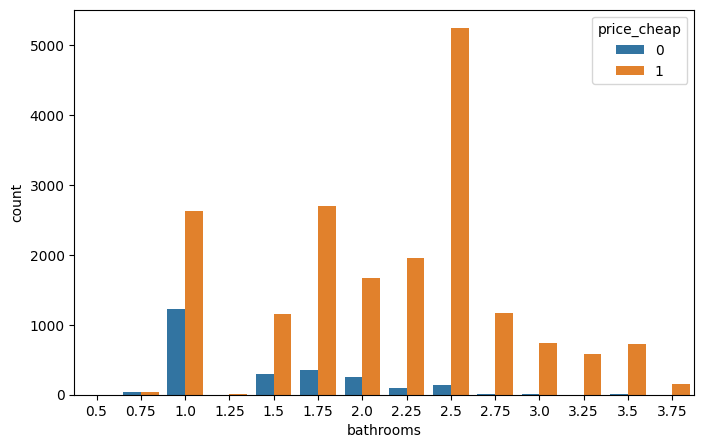

In [237]:
# variables in bins, interesting for Erin Robinson price bin 1
df_eda['price_bins']=pd.cut(df_eda['price'],bins=[0,250000,300000,350000,400000,450000,500000,600000,800000,10000000],labels=[1,2,3,4,5,6,7,8,9])
df_eda['basement']=pd.cut(df_eda['sqft_basement'],bins=[-1,1,5000],labels=[0,1])
df_eda['renovated']=pd.cut(df_eda['yr_renovated'],bins=[-1,1,5000],labels=[0,1])
df_eda['zip_groups']=pd.cut(df_eda['zipcode'],bins=10,labels=[1,2,3,4,5,6,7,8,9,10])
sns.countplot(data=df_eda[(df_eda['bathrooms']<4)],x='bathrooms',hue='price_cheap')
df_eda['price_cheap']=pd.cut(df_eda['price'],bins=[0,250000,10000000],labels=[0,1])

# df_poor, cheaper houses
df_poor=df_eda[(df_eda['price']<250000)&((df_eda['zipcode']==98001)|(df_eda['zipcode']==98002))]
df_poor_working=df_poor.copy()
df_poor_working=df_poor_working.select_dtypes(include=['number'])
del df_poor_working['waterfront']
del df_poor_working['id.1']
df_poor_working.corr(method='pearson')


<Axes: xlabel='grade', ylabel='count'>

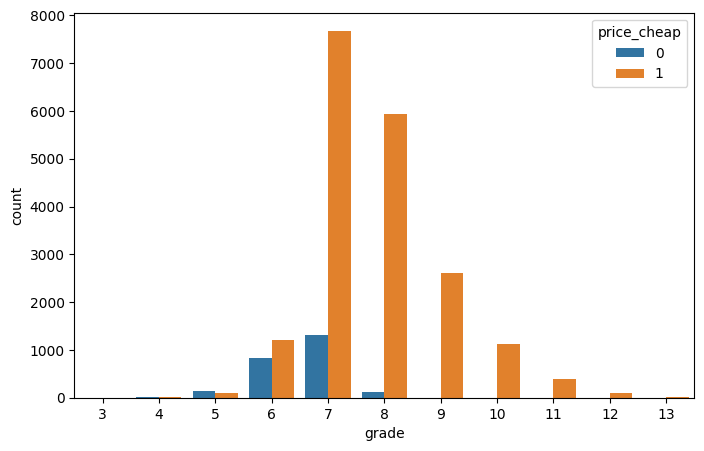

In [238]:
sns.countplot(data=df_eda,x='grade',hue='price_cheap')

<Axes: xlabel='living_space', ylabel='count'>

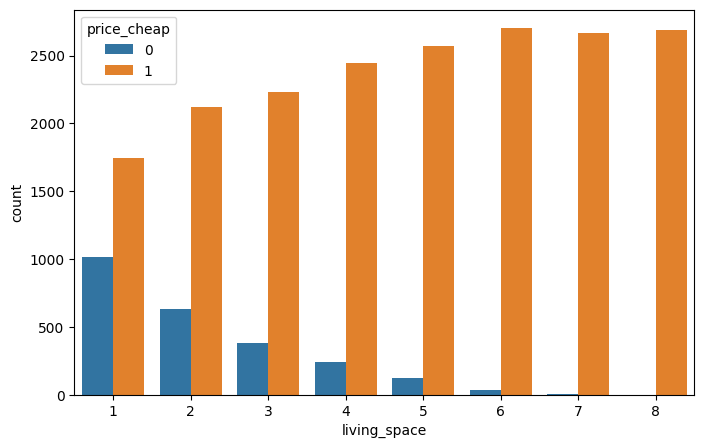

In [239]:
df_eda['living_space']=pd.qcut(df_eda['sqft_living'],q=8,labels=[1,2,3,4,5,6,7,8])
sns.countplot(data=df_eda,x='living_space',hue='price_cheap')

In [185]:
# new variable located
df_eda['long_loc']=pd.qcut(df_eda['long'],q=10,labels=[1,2,3,4,5,6,7,8,9,10])
df_eda['lat_loc']=pd.qcut(df_eda['lat'],q=10,labels=[1,2,3,4,5,6,7,8,9,10])
df_eda = df_eda.astype({'long_loc': int})
df_eda = df_eda.astype({'lat_loc': int})
df_eda.eval('loc_cell=lat_loc+10*(long_loc-1)',inplace=True)
df_cross_loc=pd.crosstab(df_eda['loc_cell'],df_eda['price_bins'],margins=True)
df_cross_loc
#df_cross_loc.loc[40:51]

price_bins,1,2,3,4,5,6,7,8,9,All
loc_cell,,,,,,,,,,
1,67,69,20,13,7,3,6,3,0,188
2,2,2,6,7,8,9,10,14,5,63
3,2,10,6,4,1,7,8,8,8,54
4,23,33,40,51,43,19,55,49,21,334
5,10,12,39,66,67,52,77,58,41,422
...,...,...,...,...,...,...,...,...,...,...
97,8,7,14,5,13,8,22,35,28,140
98,1,2,6,7,3,3,4,14,23,63
99,15,0,10,15,20,13,22,24,9,128


In [11]:
df_er_loc=df_eda[df_eda['price_bins']==1]
df_er_cross=pd.crosstab(df_er_loc['lat_loc'],df_er_loc['long_loc'])
df_er_cross

long_loc,1,2,3,4,5,6,7,8,9,10
lat_loc,,,,,,,,,,
1,67,102,75,77,146,146,41,30,33,94
2,2,0,84,87,36,66,94,53,124,4
3,2,23,109,67,112,75,80,13,4,13
4,23,108,67,11,96,8,25,1,5,10
5,10,10,5,17,23,0,0,1,0,5
6,3,0,0,10,0,0,0,2,0,0
7,0,0,0,1,0,0,0,0,0,8
8,0,0,0,0,0,0,3,0,0,1
9,0,9,16,2,2,2,0,0,0,15


In [12]:
# identifying "poor" neighborhood, assumption: poor neighborhood means areas with cheaper houses
df_eda.groupby(['zipcode','price_bins']).count()['id']
df_cross=pd.crosstab(df_eda['zip_groups'],df_eda['price_bins'],margins=True,normalize='index')
df_cross

price_bins,1,2,3,4,5,6,7,8,9
zip_groups,,,,,,,,,
1,0.160,0.094,0.068,0.054,0.067,0.068,0.119,0.150,0.220
2,0.134,0.133,0.114,0.100,0.088,0.073,0.106,0.117,0.135
3,0.117,0.130,0.141,0.105,0.099,0.073,0.122,0.137,0.076
4,0.008,0.019,0.039,0.058,0.082,0.094,0.190,0.302,0.206
5,0.211,0.251,0.214,0.137,0.071,0.046,0.031,0.028,0.011
6,0.047,0.047,0.072,0.075,0.099,0.098,0.181,0.210,0.171
7,0.043,0.076,0.130,0.183,0.160,0.103,0.125,0.119,0.060
8,0.136,0.118,0.176,0.139,0.116,0.069,0.090,0.087,0.069
9,0.288,0.154,0.113,0.087,0.071,0.051,0.073,0.086,0.077


<Axes: xlabel='long_loc', ylabel='lat_loc'>

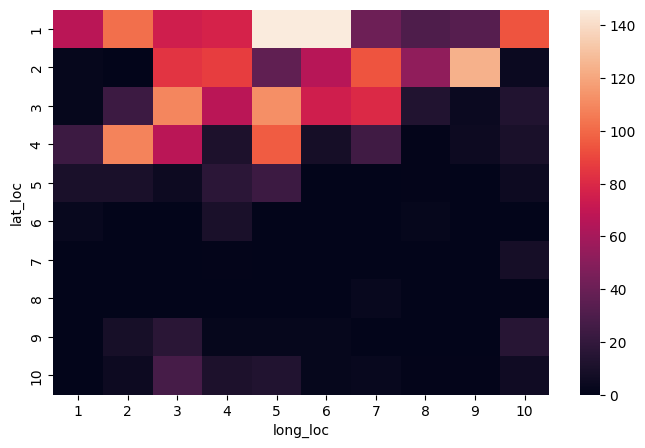

In [13]:
sns.heatmap(data=df_er_cross)

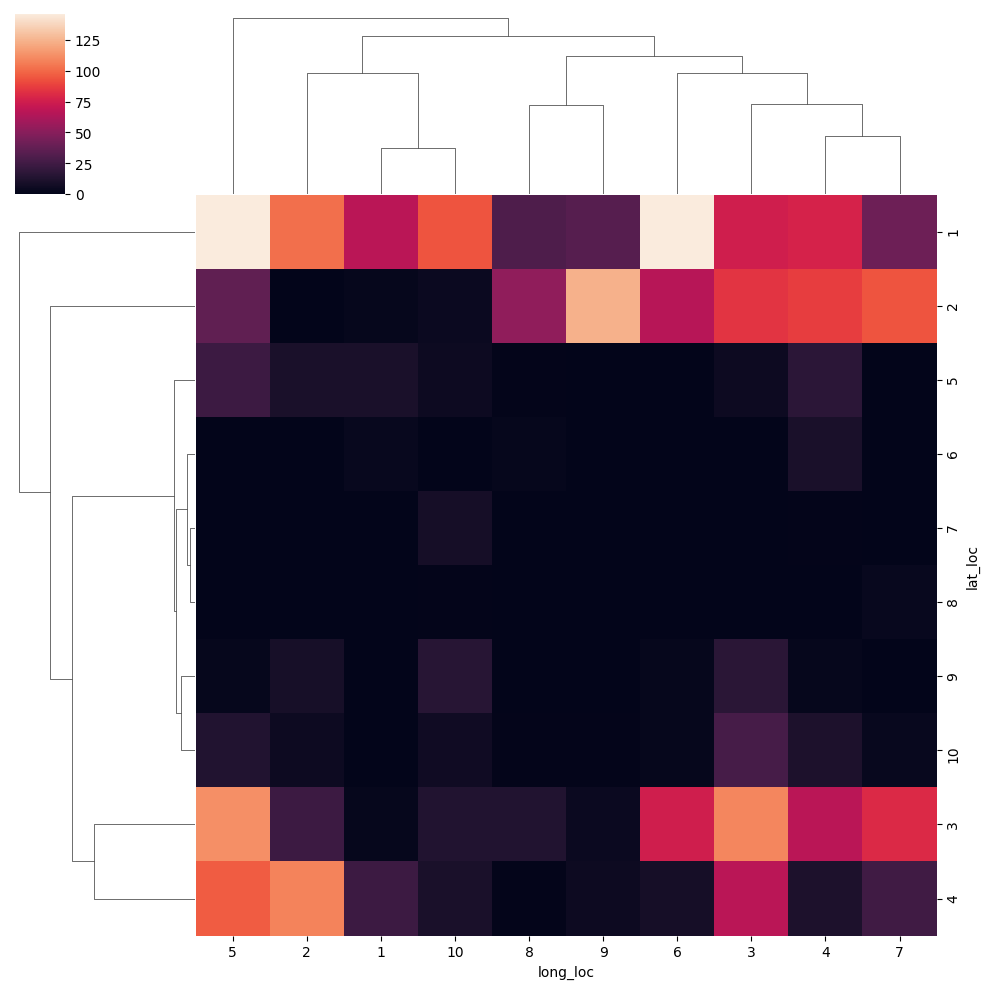

In [14]:
df_cross1=pd.crosstab(df_eda['zipcode'],df_eda['price_bins'],margins=True,normalize='index')
df_cross1
sns.clustermap(data=df_er_cross)

condition
2      3
3    115
4    145
5     29
Name: id, dtype: int64

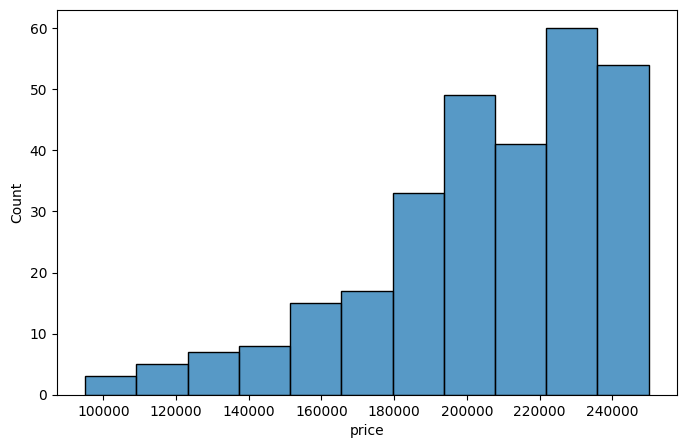

In [15]:
df_er=df_eda[(df_eda['price_bins']==1) & ((df_eda['loc_cell']==41) | (df_eda['loc_cell']==51))]
df_er.groupby('zipcode').count()
df_er.groupby('bedrooms').count()['id'] 
df_er.groupby('bathrooms').count()['id']   # drop <1
df_er.describe()['sqft_living']           # <900? 
#sns.histplot(data=df_er,x='sqft_lot')
df_er.describe()['sqft_lot']              #outlier >20000 check
df_er.groupby('floors').count()['id']      
df_er.groupby('waterfront').count()['id']  # no waterfront
df_er.groupby('view').count()['id']        #view =0 for almost all houses
df_er.groupby('condition').count()['id']   #drop <3
df_er.describe()['sqft_above']             
df_er.groupby('basement').count()['id']        
df_er.groupby('yr_built').count()['id']    
#sns.histplot(data=df_er,x='yr_built')       # check new houses >2000
df_er.groupby('renovated').count()['id']  # no renovation for almost all houses
df_er.groupby('grade').count()['id'] 
df_er.groupby('zipcode').count()['id']
df_er.describe()['sqft_living15']         
df_er.describe()['sqft_lot15']             
df_er.describe()['price']                 
sns.histplot(data=df_er,x='price')
df_er.groupby('condition').count()['id'] 

<Axes: xlabel='price', ylabel='Count'>

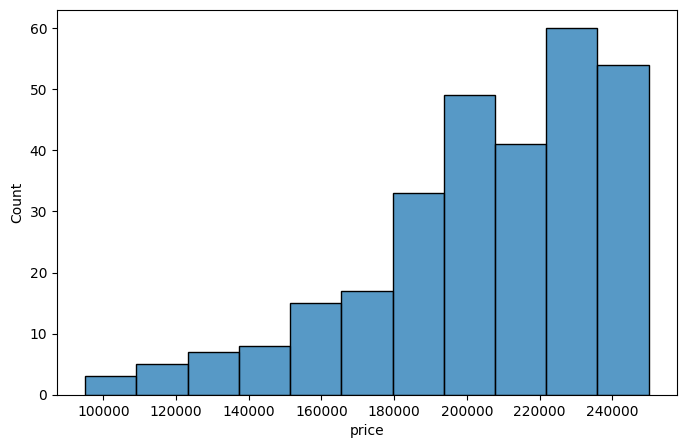

In [16]:
df_er1=df_er[(df_er['condition']>3)]
df_er1.groupby('zipcode').count()
df_er1.groupby('bedrooms').count()['id'] 
df_er1.groupby('bathrooms').count()['id']   # drop <1
df_er1.describe()['sqft_living']           # <900? 
#sns.histplot(data=df_er,x='sqft_lot')
df_er1.describe()['sqft_lot']              #outlier >20000 check
df_er1.groupby('floors').count()['id']      
df_er1.groupby('waterfront').count()['id']  # no waterfront
df_er1.groupby('view').count()['id']        #view =0 for almost all houses
df_er1.groupby('condition').count()['id']   #drop <3
df_er1.describe()['sqft_above']             
df_er1.groupby('basement').count()['id']        
df_er1.groupby('yr_built').count()['id']    
#sns.histplot(data=df_er1,x='yr_renovated')       # check new houses >2000
df_er1.groupby('yr_renovated').count()['id']  # no renovation for almost all houses
df_er1.groupby('grade').count()['id'] 
df_er1.groupby('zipcode').count()['id']
df_er1.describe()['sqft_living15']         
#df_er1.describe()['sqft_lot15']             
df_er1.describe()['price']                 
sns.histplot(data=df_er,x='price')
#df_er1.groupby('condition').count()['id'] 

In [17]:
df_er[(df_er['sqft_lot']>20000)].head(30)[['yr_built','long','zipcode','lat','sqft_lot','sqft_living','sqft_living15','sqft_lot15','date']]

,yr_built,long,zipcode,lat,sqft_lot,sqft_living,sqft_living15,sqft_lot15,date
995,1920,-122.250,98001,47.279,20917.000,1590.000,1310.000,6000.000,2014-09-17
2374,1958,-122.267,98001,47.327,44431.000,1300.000,1470.000,14850.000,2014-05-23
2404,1947,-122.252,98001,47.275,24000.000,1610.000,1270.000,9600.000,2014-09-02
2800,1952,-122.198,98092,47.331,32214.000,1180.000,2300.000,13714.000,2014-12-19
3483,1967,-122.262,98001,47.328,22489.000,1070.000,1880.000,20250.000,2014-12-15
6350,1942,-122.271,98001,47.274,33888.000,1900.000,1430.000,19200.000,2014-05-13
8241,1912,-122.241,98001,47.310,21750.000,1280.000,1520.000,21750.000,2014-07-18
8728,1955,-122.275,98001,47.295,33664.000,860.000,1290.000,18287.000,2014-09-29
13642,1972,-122.245,98001,47.263,22443.000,1220.000,1260.000,19950.000,2014-09-04
14741,1969,-122.285,98001,47.307,21000.000,1300.000,2120.000,9920.000,2014-06-09


In [241]:
import plotly.graph_objects as go

import plotly.express as px 

df_cheep=df_eda[(df_eda['price_bins']==1)]

px.set_mapbox_access_token('pk.eyJ1IjoiYWNsNzMiLCJhIjoiY2xub3FsdHFwMDNkMzJubHFyczdwam9uciJ9.cNmgvY-fY4RgCkw5iMPm3g')


scatter = go.Scattermapbox(   
         lat = df_eda['lat'],
         lon = df_eda['long'],   
         mode = 'markers',
          marker = dict( size = 8, opacity = 0.8, color = df_eda['price_bins'],colorscale='Viridis',colorbar=dict(title='Price')),
           ) 
fig = go.Figure(scatter) 
fig.update_layout(  
              mapbox_style="streets", 
              mapbox=dict( accesstoken=mapbox_token, center={"lat": df_eda['lat'].mean(), "lon": df_eda['long'].mean()},
               zoom=10,) )


#fig.update_layout(title="Map King County, Washington")  
fig.show()


In [176]:
px.set_mapbox_access_token('pk.eyJ1IjoiYWNsNzMiLCJhIjoiY2xub3FsdHFwMDNkMzJubHFyczdwam9uciJ9.cNmgvY-fY4RgCkw5iMPm3g')

fig = px.scatter_mapbox(df_eda[(df_eda['price_bins']==1)], lat="lat", lon="long", size="id", zoom=3)
fig.update_traces(cluster=dict(enabled=True))
fig.show()

<Axes: xlabel='month', ylabel='price'>

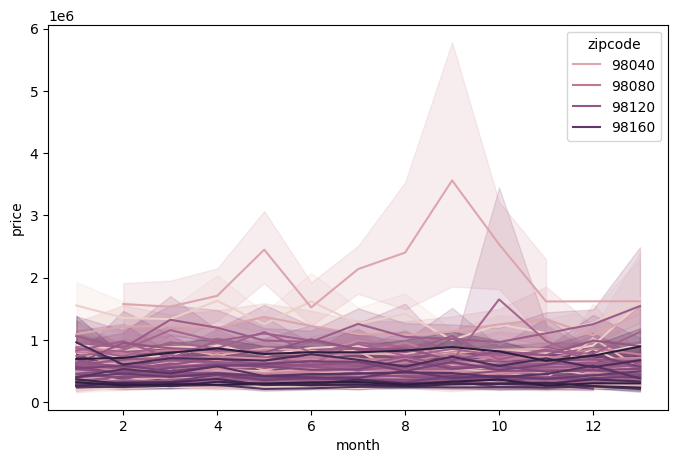

In [98]:
df_eda['month']=df_eda['date'].dt.month
df_eda['year']=df_eda['date'].dt.year
df_eda = df_eda.astype({'month': int})
df_eda = df_eda.astype({'year': int})
df_eda.loc[(df_eda['month']==5)&(df_eda['year']==2015),'month']=13
df_eda.groupby('month')['price'].mean()
#sns.lineplot(data=df_eda, x="month", y="price")
sns.lineplot(data=df_eda, x="month", y="price",hue="zipcode")
#sns.lineplot(data=df_eda[(df_eda['price_bins']==1)], x="month", y="price")

In [250]:
import plotly.graph_objects as go

import plotly.express as px 

df_erin=df_eda[(df_eda['price_bins']==1) & ((df_eda['zipcode']==98001) | (df_eda['zipcode']==98002))&(df_eda['condition']>3)]

px.set_mapbox_access_token('pk.eyJ1IjoiYWNsNzMiLCJhIjoiY2xub3FsdHFwMDNkMzJubHFyczdwam9uciJ9.cNmgvY-fY4RgCkw5iMPm3g')


scatter = go.Scattermapbox(   
         lat = df_erin['lat'],
         lon = df_erin['long'],   
         mode = 'markers',
          marker = dict( size = 8, opacity = 0.8, ),
           ) 
fig = go.Figure(scatter) 
fig.update_layout(  
              mapbox_style="streets", 
              mapbox=dict( accesstoken=mapbox_token, center={"lat": df_erin['lat'].mean(), "lon": df_erin['long'].mean()},
               zoom=10,) )


#fig.update_layout(title="Map King County, Washington")  
fig.show()

In [251]:
df_erin.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,170.000,170.000,170.000,170.000,170.000,170.000,157.000,170.000,170.000,170.000,...,170.000,133.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000
mean,4660643520.788,3.065,1.444,1404.788,10225.671,1.121,0.000,0.000,4.171,6.518,...,1953.965,295.038,98001.588,47.302,-122.238,1384.900,9269.247,206880.747,4660643520.788,9888.624
std,2660073690.917,0.706,0.455,388.038,6121.578,0.280,0.000,0.000,0.377,0.707,...,20.910,2396.836,0.494,0.022,0.030,315.685,3523.577,32950.505,2660073690.917,5782.839
min,16000200.000,1.000,0.750,690.000,3171.000,1.000,0.000,0.000,4.000,5.000,...,1903.000,0.000,98001.000,47.260,-122.294,860.000,4200.000,95000.000,16000200.000,19.000
25%,2770250315.000,3.000,1.000,1095.000,7195.500,1.000,0.000,0.000,4.000,6.000,...,1946.250,0.000,98001.000,47.286,-122.270,1162.000,7282.000,186475.000,2770250315.000,4842.250
50%,4013300128.000,3.000,1.500,1320.000,8608.500,1.000,0.000,0.000,4.000,7.000,...,1959.000,0.000,98002.000,47.303,-122.222,1345.000,8358.000,209475.000,4013300128.000,10495.000
75%,7335400312.500,3.000,1.750,1667.500,10737.000,1.000,0.000,0.000,4.000,7.000,...,1967.750,0.000,98002.000,47.314,-122.214,1540.000,10237.000,233875.000,7335400312.500,14783.250
max,9543000896.000,6.000,3.000,2460.000,44431.000,2.000,0.000,0.000,5.000,8.000,...,1990.000,19670.000,98002.000,47.358,-122.195,2880.000,22800.000,250000.000,9543000896.000,19414.000


<Axes: xlabel='long_3', ylabel='lat_3'>

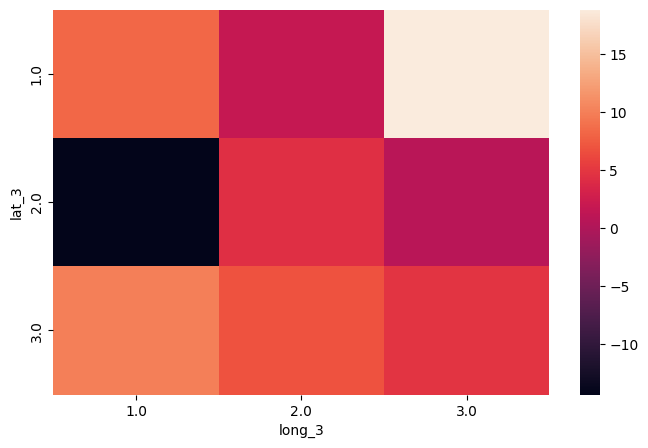

In [175]:
df_eda['long_3']=pd.qcut(df_eda['long'],q=3,labels=[1,2,3])
df_eda['lat_3']=pd.qcut(df_eda['lat'],q=3,labels=[1,2,3])
df_eda = df_eda.astype({'long_3': int})
df_eda = df_eda.astype({'lat_3': int})
df_eda.eval('loc_9=long_3+3*(lat_3-1)',inplace=True)
df_zipmon=df_eda.groupby(['loc_9','month'])['price'].median().unstack()
diff=(df_zipmon.iloc[:,12]-df_zipmon.iloc[:,0])*100/df_zipmon.iloc[:,0]
df_zipmon['diff']=diff
df_zipmon['loc_9']=df_zipmon.index
df_zipmon.loc[(df_zipmon['loc_9']==1)|(df_zipmon['loc_9']==4)|(df_zipmon['loc_9']==7),'long_3']=1
df_zipmon.loc[(df_zipmon['loc_9']==2)|(df_zipmon['loc_9']==5)|(df_zipmon['loc_9']==8),'long_3']=2
df_zipmon.loc[(df_zipmon['loc_9']==3)|(df_zipmon['loc_9']==6)|(df_zipmon['loc_9']==9),'long_3']=3
df_zipmon.loc[(df_zipmon['loc_9']==1)|(df_zipmon['loc_9']==2)|(df_zipmon['loc_9']==3),'lat_3']=1
df_zipmon.loc[(df_zipmon['loc_9']==4)|(df_zipmon['loc_9']==5)|(df_zipmon['loc_9']==6),'lat_3']=2
df_zipmon.loc[(df_zipmon['loc_9']==7)|(df_zipmon['loc_9']==8)|(df_zipmon['loc_9']==9),'lat_3']=3
df_zipmon.head(20)
sns.heatmap(df_zipmon.groupby(['lat_3','long_3'])['diff'].median().unstack())
#sns.barplot(df_zipmon,x='loc_9',y='diff')
